In [1]:
import numpy as np
import numdifftools as nd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from matplotlib import cm

# <font color = 'red'> ЛР 3. Регуляризация и линейная регрессия. Простейший градиентный спуск. </font>

Сложность: <font color = 'orange'> Нормально  </font>.

Дата составления: 20.09.2023

Срок выполнения: 2 недели (с момента первой практики после выдачи).

Автор: ст. преподаватель Кушнеров А.В.

## <font color = 'green'> 1. Регуляризация.  </font>

**Регуляризация** - метод добавления некоторых дополнительных ограничений к условию с целью решить некорректно поставленную задачу или предотвратить переобучение.

Наиболее распростанены два вида регуляризации в линейной регресии это Грёбневая регуляризация (L2) и Лассо регуляризация (L1).

В случае линейной регрессии регуляризация предпалагает наложение штрафа на функцию потерь регрессии по следующим формулам. Все обозначения в терминах предыдущей ЛР.

$$ \mathcal{L1}(\overline{w}) = (\overline{y} - Q\cdot\overline{w})(\overline{y} - Q\cdot\overline{w})^{T} + \alpha||\overline{w}||_{1}, $$
$$ \mathcal{L2}(\overline{w}) = (\overline{y} - Q\cdot\overline{w})(\overline{y} - Q\cdot\overline{w})^{T} + \alpha||\overline{w}||_{2}, $$

Далее задача оптимизации решается уже относительно этих функций потерь.



<font color = 'red' size = 5>Задание 1 </font>

1. Используя встроенные функции пакета sklearn, реализуйте небольшие программы моделирующие лин. регрессию с регуляризацией L1 или L2 на искусственных данных. Сделайте выводы о поведении весовых коэффициентов в зависимости от разного количества фич в том числе полиномиальных.
2. Как регуляризация влияет на метрики качества моделей?
3. С какими проблемами вы столкнулись при использовании формулы вычисления весов регрессии из ЛР2? Можно ли их решить регуляризацией? С помощью матриц покажите на примере алгебраический смысл регуляризации.
4. Модифицируйте вашу собственную функцию для нахождения весов регрессии из ЛР2 таким образом, чтобы она соответсвовала функции потерь L2 - регуляризации. Аналитическое решение задачи оптимизации было получено на лекции. Сравните результаты работы вашей функции со встроенной.

1.

In [2]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [3]:
X, y = make_regression(n_samples=100, n_features=2, noise=0.1)

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

lasso = Lasso(alpha=0.1)
lasso.fit(X_poly, y)

ridge = Ridge(alpha=0.1)
ridge.fit(X_poly, y)


print("Lasso coefficients:", lasso.coef_)
print("Ridge coefficients:", ridge.coef_)

Lasso coefficients: [ 0.         15.00352586 22.25157492  0.         -0.         -0.        ]
Ridge coefficients: [ 0.00000000e+00  1.50841961e+01  2.23283494e+01 -3.99585461e-03
 -5.18597714e-03 -7.24079010e-03]


Весовые коэффициенты показывают, насколько каждый признак влияет на предсказываемую переменную. В случае Lasso регуляризации, некоторые коэффициенты могут обнулиться, что делает этот метод полезным для отбора признаков. В случае Ridge регуляризации, коэффициенты уменьшаются, но не обнуляются, что может быть полезно при наличии коррелирующих признаков.

При увеличении количества полиномиальных признаков, весовые коэффициенты могут стать более сложными для интерпретации, но они могут помочь улучшить точность модели.

2.
Регуляризация помогает предотвратить переобучение и улучшая обобщающую способность модели.

Переобучение: Без регуляризации, модель может "слишком хорошо" подстроиться под обучающие данные, что приводит к переобучению. Это означает, что модель будет плохо работать на новых, тестовых данных, потому что она слишком специфична для обучающих данных. Регуляризация помогает предотвратить это, добавляя штраф к весовым коэффициентам, что приводит к более простой модели.

Обобщающая способность: Регуляризация улучшает обобщающую способность модели, то есть ее способность работать хорошо на новых данных. Это достигается за счет уменьшения сложности модели и предотвращения переобучения.

3.

In [4]:
def l1_reg(weights, alpha):
    return alpha*np.sum(np.abs(weights))

def l2_reg(weights,alpha):
    return alpha*np.sum(np.abs(weights**2))

In [5]:
import numpy as np

weights = np.array([0.1, -0.5, 0.3, 0.8])
alpha = 0.01

l1 = l1_reg(weights, alpha)
print(f"L1 regularization: {l1}")

L1 regularization: 0.017


In [6]:
l2 = l2_reg(weights, alpha)
print(f"L2 regularization: {l2}")

L2 regularization: 0.0099


4. 

In [7]:
def createQ(X):
    n = X.shape[0]
    Q = np.concatenate([np.ones(n).reshape(n, 1), X], axis=1)
    return Q

In [8]:
def fit(X, y, fit_intercept = False, alpha = 0):
        if fit_intercept:
            Q = createQ(X)
            ridge = alpha * np.eye(Q.shape[1])
            rez = np.dot(np.dot(np.linalg.inv(np.dot(Q.T , Q) + ridge) , (Q.T)) , y)
            intercept = rez[0]
            coef = rez[1:]
        else:    
            intercept = 0
            ridge = alpha * np.eye(X.shape[1])
            coef = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + ridge) , (X.T)) , y)
        return intercept, coef

In [9]:
def predict(X, intercept, coef):
        Q = createQ(X)
        return np.dot(Q , np.concatenate([[intercept], coef]))

In [10]:
def score(X, y, intercept, coef):
        Q = createQ(X)
        f = np.dot(np.concatenate([[intercept], coef]), Q.T)
        R2 = 1 - np.dot(y - f, (y - f).T) / np.dot(y - np.mean(y), (y - np.mean(y)).T)
        return R2

In [11]:
X, y = make_regression(n_samples=100, n_features=2, noise=0.1)

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

ridge = Ridge(fit_intercept = False,alpha=0.1)
ridge.fit(X_poly, y)

intercept, coef = fit(X_poly, y, alpha = 0.1)

print("Ridge sklearn:", ridge.coef_)
print("My Ridge:", coef)

Ridge sklearn: [-9.75899329e-03  2.75474756e+01  3.14275947e+01  1.10135906e-02
  1.18226084e-02 -1.20442862e-02]
My Ridge: [-9.75899329e-03  2.75474756e+01  3.14275947e+01  1.10135906e-02
  1.18226084e-02 -1.20442862e-02]


## <font color = 'green'> 2. Переобучение. </font>

**Переобучение** - явление, когда построенная модель МО хорошо объясняет примеры из обучающей выборки, но относительно плохо работает на примерах из тестовой выборки. 

<font color = 'orange' size = 3>Пример 1 </font>

Изучите следующий пример.

In [12]:
rng = np.random.RandomState(1) # задаём искусственные данные
x = 10 * rng.rand(60)
y = x**2/10 + 0.9 * rng.randn(60)

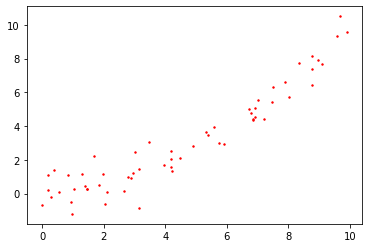

In [13]:
plt.scatter(x, y, c ='red',s=2)

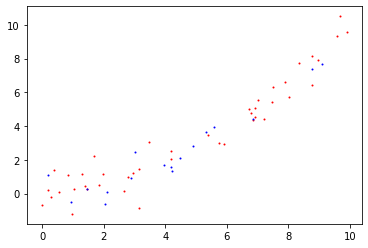

In [14]:
# разделили данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(x[:, np.newaxis], y, test_size=0.27, random_state=42) 
plt.scatter(X_train, y_train, c='red', s=1)
plt.scatter(X_test, y_test, c='blue', s=1)

По наблюдениям из ЛР2 можно сделать вывод, что добавление полиномиальных фич (усложнение модели) повышает точность. Попробуем построить график, на котором увидим зависимость между метрикой R2 и степенью полиномиальных фич в модели. Это параметр можно считать гиперпараметром модели. 

**Гиперпараметры** – это внешние переменные конфигурации, с помощью которых специалисты по данным управляют обучением модели МО. Гиперпараметры (иногда их называют гиперпараметрами модели) настраиваются вручную перед обучением модели. Кстати, коэффициенты $\alpha$ в формулах регуляризаций тоже гиперпараметры.

График зависимости гиперпараметра от метрики качества модели называют  **валидационной кривой**.

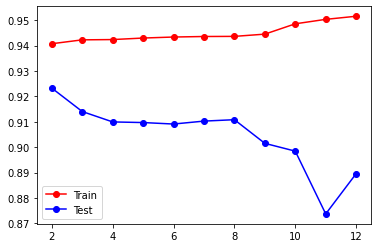

In [15]:
degress = list(range(2, 13))
scores_test = []
scores_train = []
for i in degress:
    model = make_pipeline(PolynomialFeatures(degree=i),
                          LinearRegression(fit_intercept=False))
    model.fit(X_train, y_train)
    scores_test.append(model.score(X_test, y_test))
    scores_train.append(model.score(X_train, y_train))
plt.plot(degress, scores_train, 'r-o')
plt.plot(degress, scores_test, 'b-o')
plt.legend(['Train', 'Test'])

Как видим, при увеличении количества полиномиальных фич наблюдаем падение качества валидации на тестовых данных, при росте качества на обучающих - классическое переобучение.

<font color = 'red' size = 5>Задание 2. </font>

1. На искусственных данных смоделируйте переобучение модели линейной регрессии. 
2. С помощью различных моделей регуляризации попробуйте сохранив сложность модели, которая увеличивает качество, избежать переобучения. Потренируйтесь в подборе коэффициентов силы регуляризации. 

1.

In [16]:
np.random.seed(0)
n_samples = 100

X = np.linspace(0, 10, n_samples)
y = X**3 + np.random.randn(n_samples) * 100 + 100
X = X[:, np.newaxis]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

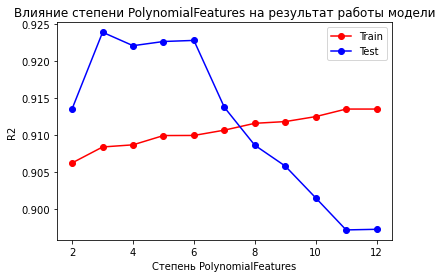

In [17]:
degrees = list(range(2, 13))
scores_train = []
scores_test = []

for i in degrees:
    model = make_pipeline(PolynomialFeatures(degree=i), LinearRegression())
    model.fit(X_train, y_train)
    scores_train.append(model.score(X_train, y_train))
    scores_test.append(model.score(X_test, y_test))

plt.plot(degrees, scores_train, 'r-o', label='Train')
plt.plot(degrees, scores_test, 'b-o', label='Test')
plt.legend()
plt.xlabel('Степень PolynomialFeatures')
plt.ylabel('R2')
plt.title('Влияние степени PolynomialFeatures на результат работы модели')
plt.show()

2.

C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.451e+05, tolerance: 7.557e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.54785e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.451e+05, tolerance: 7.557e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_ridg

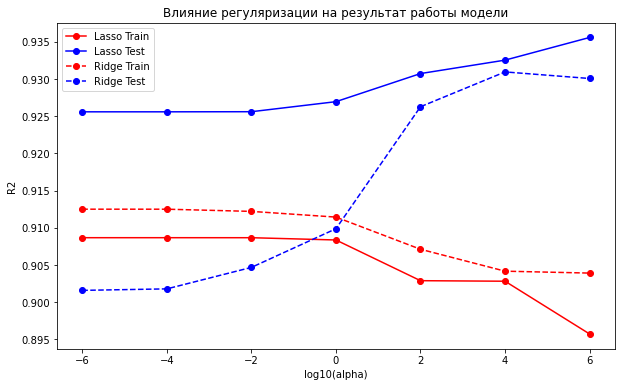

In [18]:
alphas = np.logspace(-6, 6, 7)
scores_lasso_train = []
scores_lasso_test = []
scores_ridge_train = []
scores_ridge_test = []

for alpha in alphas:
    lasso = make_pipeline(PolynomialFeatures(degree=10), Lasso(alpha=alpha))
    lasso.fit(X_train, y_train)
    scores_lasso_train.append(lasso.score(X_train, y_train))
    scores_lasso_test.append(lasso.score(X_test, y_test))

    ridge = make_pipeline(PolynomialFeatures(degree=10), Ridge(alpha=alpha))
    ridge.fit(X_train, y_train)
    scores_ridge_train.append(ridge.score(X_train, y_train))
    scores_ridge_test.append(ridge.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(np.log10(alphas), scores_lasso_train, 'r-o', label='Lasso Train')
plt.plot(np.log10(alphas), scores_lasso_test, 'b-o', label='Lasso Test')
plt.plot(np.log10(alphas), scores_ridge_train, 'r--o', label='Ridge Train')
plt.plot(np.log10(alphas), scores_ridge_test, 'b--o', label='Ridge Test')
plt.legend()
plt.xlabel('log10(alpha)')
plt.ylabel('R2')
plt.title('Влияние регуляризации на результат работы модели')
plt.show()

In [19]:
alphas

array([1.e-06, 1.e-04, 1.e-02, 1.e+00, 1.e+02, 1.e+04, 1.e+06])

## <font color = 'green'> 3. Градиентный спуск.  </font>

В предыдущей ЛР мы решили задачу оптимизации, отыскав аналититческое решение в виде формулы. Способ хороший, но не всегда возможный в силу свойств функций и данных. Попробуем вооружиться ещё одним методом решения задач обучения моделей.

<font color = 'red' size = 5>Задание 3. </font>

1. Изучите базовый алгоритм [градиентного спуска](https://en.wikipedia.org/wiki/Gradient_descent)  по ссылке или лекционным записям. 
2. Реализуйте простой алгоритм градиентного спуска с постоянным шагом, для решения задачи нахождения минимума некторой функции двух переменных. Графически подтвердите ваши вычисления (на лекции был показан пример). 
3. Используя градиентный спуск, реализуйте собственную функцию обучения для какой либо из изученных ранее регрессий. Тщательно протестируйте. Всегда ли будет сходится (выдавать корректное решение) ваш алгоритм? От каким параметров зависит работа алгоритма? Сравните полученные резульататы со встроенными функциями.
4. Подумайте над улучшением алгоритма с точки зрения сходимости.
 

2.

In [20]:
class GradientDescent:
    def __init__(self, func, grad, step=0.1, tol=1e-6, n_iter=50):
        self.func = func
        self.grad = grad
        self.step = step
        self.tol = tol
        self.n_iter = n_iter

    def run(self, start):
        self.path = []
        x = start
        self.path.append(x)
        for _ in range(self.n_iter):
            x_prev = x
            x = x - self.step * self.grad(*x)
            self.path.append(x)
            if np.sum((x - x_prev)**2) < self.tol**2:
                break
        self.path = np.array(self.path)

    def plot(self):
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        x = np.linspace(-2, 2, 100)
        y = np.linspace(-2, 2, 100)
        X, Y = np.meshgrid(x, y)
        Z = self.func(X, Y)

        ax.plot_surface(X, Y, Z, cmap=cm.viridis, alpha=0.5)
        ax.plot(*self.path.T, self.func(*self.path.T), color='r', marker='o')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        plt.show()

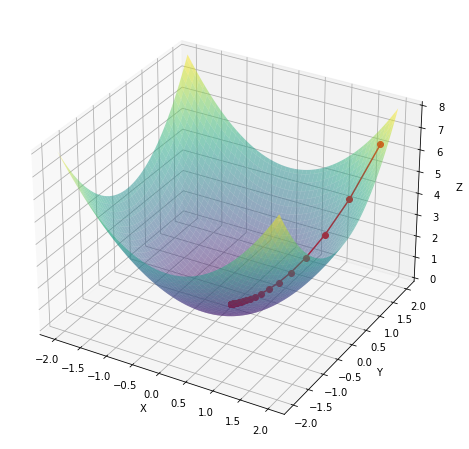

In [21]:
def func(x, y):
    return x**2 + y**2

grad = nd.Gradient(func) 

gd = GradientDescent(func, grad, n_iter=500)
start = np.array([1.8, 1.8])
gd.run(start)
gd.plot()

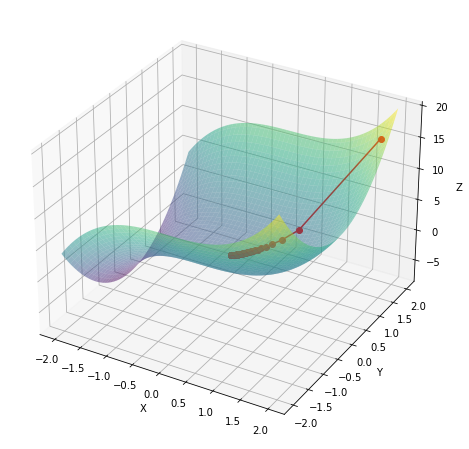

In [22]:
def func(x, y):
    return x**3 + 3*y**2

grad = nd.Gradient(func) 

gd = GradientDescent(func, grad, n_iter=500)
start = np.array([1.8, 1.8])
gd.run(start)
gd.plot()

3.

In [23]:
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iter):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias
    
    def score(self, X, y):
        y_pred = self.predict(X)
        ssr = np.sum((y - y_pred)**2)
        sst = np.sum((y - np.mean(y))**2)
        r2 = 1 - ssr / sst
        return r2

In [24]:
X, y = make_regression(n_samples=100, n_features=1, noise=20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_gd = LinearRegressionGD()
model_gd.fit(X_train, y_train)
print("Gradient Descent R2:", model_gd.score(X_test, y_test))

model_sklearn = LinearRegression()
model_sklearn.fit(X_train, y_train)
print("Sklearn R2:", model_sklearn.score(X_test, y_test))

Gradient Descent R2: 0.02525372574345852
Sklearn R2: 0.025254338517341157


<font color = 'red' size = 5>Задание 4. </font>

1. Используя полученные знания о линейной регрессии примените их на реальных данных (два датасета ниже). Применяйте различные методы, стройте валидационные кривые, подбирайте гиперпараметры, преобразуйте данные, для получения лучших по качеству эстиматоров. 
2. При работе используйте не только встроенные, но и свои собственные функции. 
3. Самостоятельно изучите модель регуляризации [Elastic net](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) и найдите ей применение.

Данные.

1. Данные о велосипедном трафике из файлов (fermont_bridge.csv) и (BycicleWeather.csv). В одном из файлов данные о количестве велосипедистов, проехавщих по мосту в виде временного ряда, а в другом данные о погоде в том же районе. Совместите и предскажите велотрафик.
2. Данные о расходе топлива автомобилями по ссылке [AutoMpg](https://www.kaggle.com/datasets/uciml/autompg-dataset/data)


In [26]:
counts = pd.read_csv('fremont-bridge.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('BicycleWeather.csv', index_col='DATE', parse_dates=True)

FileNotFoundError: [Errno 2] No such file or directory: 'fremont-bridge.csv'

In [ ]:
counts

In [ ]:
weather.head()

In [ ]:
daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] 
daily

In [ ]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

In [ ]:
daily

In [ ]:
holidays =  USFederalHolidayCalendar().holidays('2012', '2018')[:-1]
holidays

In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar

holidays =  USFederalHolidayCalendar().holidays('2012', '2018')[:-1]
daily = daily.join(pd.Series(1,index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

In [ ]:
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot()
plt.ylim(8, 17)

In [ ]:
# temperatures are in 1/10 deg C; convert to C
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

# precip is in 1/10 mm; convert to inches
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])

In [ ]:
daily['annual'] = (daily.index - daily.index[0]).days / 365.

In [ ]:
daily.head()

In [ ]:
# Drop any rows with null values
daily.dropna(axis=0, how='any', inplace=True)

column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
                'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual']
X = daily[column_names]
y = daily['Total']

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

In [ ]:
daily[['Total', 'predicted']].plot(alpha=0.5);

In [ ]:
params = pd.Series(model.coef_, index=X.columns)
params

In [ ]:
model.score(X,y)

In [ ]:
counts = pd.read_csv('fremont-bridge.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('BicycleWeather.csv', index_col='DATE', parse_dates=True)

daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # remove other columns

days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)
    

from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot()
plt.ylim(8, 17)

# temperatures are in 1/10 deg C; convert to C
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

# precip is in 1/10 mm; convert to inches
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])

daily['annual'] = (daily.index - daily.index[0]).days / 365.
daily.head()

# Drop any rows with null values
daily.dropna(axis=0, how='any', inplace=True)

column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
                'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual']
X = daily[column_names]
y = daily['Total']

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

2.

In [ ]:
dataframe=pd.read_csv("auto-mpg.csv") # загружаем данные
dataframe.head()

In [ ]:
df = pd.read_csv('auto-mpg.csv')
df.head()

In [ ]:
car_names = df['car name'].tolist()
df['type'] = [1 if 'diesel' in element else() for element in [car_names]]
df.head()

## Машины

In [27]:
auto = pd.read_csv("auto-mpg.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'auto-mpg.csv'

In [ ]:
auto = auto.drop(["car name"], axis=1)
auto.head()

In [34]:
import os
os.listdir()
os.chdir(r'Desktop/МО/2023_ML_LR3.ipynb')

FileNotFoundError: [WinError 3] Системе не удается найти указанный путь: 'Desktop/МО/2023_ML_LR3.ipynb'